In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#import main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import skew

In [5]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
#import the dataset
train = pd.read_csv("../data/train.csv")

### High level details

In [7]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

The Loan_Status is Yes and No so change it to 1 and 0

In [8]:
#change the Y to 1 and N to 0 for the Loan_Status column
train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})

In [9]:
#also change the Credit History column to Bad and Good
train['Credit_History'] = train['Credit_History'].astype("object")

In [10]:
#high level nulls and dtypes

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 62.5+ KB


In [11]:
#change the columns to their correct types
train['Credit_History'] = train['Credit_History'].astype('object')

In [12]:
train.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Loan_Status  
count   614.000000  
mean      0.687296  
std       0.463973  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

There is 68% approved loans from the Loan_Status mean. 

<AxesSubplot:>

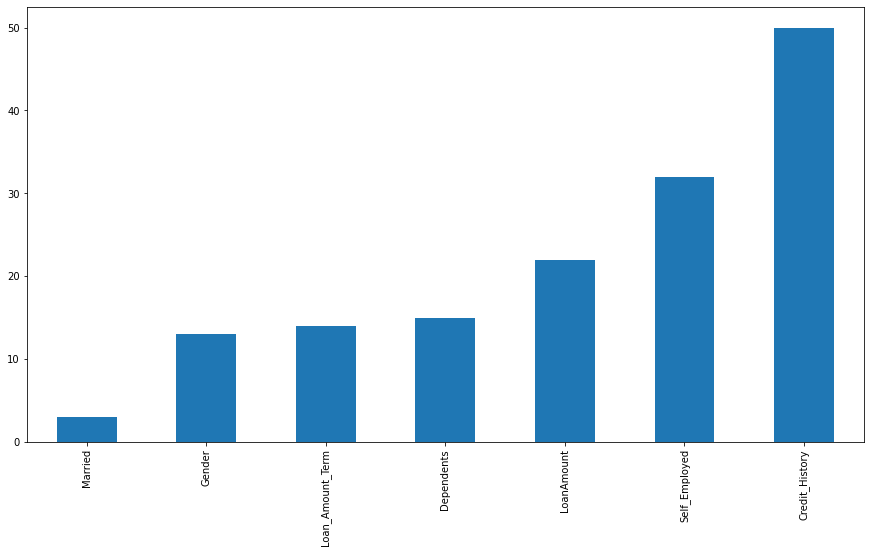

In [13]:
#columns that have missing values....
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing.plot.bar()

### Individual features exploration

In [14]:
def explore(column):
    """
    This function helps with the initial high level exploration of a column so we don't keep repeating the steps
    """
    
    #print column's data type
    print("Data type of column:", train[column].dtype)
    
    #missing values
    print(train[column].isnull().sum(),"missing values out of",len(train['Loan_ID']),"(",(train[column].isnull().sum() / len(train['Loan_ID']) * 100),"%)")
    
    #distribution
    print()
    print("Distribution of the data:")
    print()
    fig = px.histogram(train, x=column)
    fig.show()
    
    #if column is qualitative
    if train[column].dtype.name in ['object', 'category']:
        
        print("Variable is QUALITATIVE")
        print()
        
        #print the values counts
        print(train[column].value_counts())
        print()
        #print proportions
        print(train[column].value_counts(normalize = True) * 100)
        print()
        print()
        train[column] = train[column].astype('category')
        
        #what are some measures of central tendencies for each variable value
        mean_calc = train.groupby(column).Loan_Status.mean().reset_index()
        print()
        print("The approval rate per variable value is:")
        print(mean_calc)
        print()
        
        std_calc = train.groupby(column).Loan_Status.std().reset_index()
        print()
        print()
        print("The standard deviation / spread of approval rate per variable value is:")
        print(std_calc)
        
    elif train[column].dtype.name not in ['object', 'category']:
        
        print("Variable is QUANTITATIVE")
        print()
        
        #creating a boxplot highlighting the mean, median etc
        red_circle = dict(markerfacecolor='red', marker='o')
        mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')
        plt.figure(figsize = (15, 5))
        plt.boxplot(x=train[column][~train[column].isnull()], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True)
        plt.show()
        print()
        
        #see the distribution of the loan terms
        print("The description of the column: ")
        print(train[column].describe())
        print()
        
        #calculate the kurtosis
        kurtosis_calculation = kurtosis(train[column][~train[column].isnull()], fisher=False)
        print("The kurtosis is: ", kurtosis_calculation)
        if kurtosis_calculation > 3:
            print("The distribution is leptokurtic. The distribution has a sharp peak.")
        elif kurtosis_calculation == 3:
            print("The distribution is mesokurtic. The distribution has a flat peak.")
        elif kurtosis_calculation < 3:
            print("The distribution is platykurtic. The distribution follows a normal distribution.")
        print()
        
        #calculate the skeweness
        skewness_calculation = skew(train[column][~train[column].isnull()])
        print("The skewness is: ", skewness_calculation)
        if skewness_calculation >= -0.5 and skewness_calculation <= 0.5:
            print("The distribution has low skewness.")
        elif (skewness_calculation >= -1 and skewness_calculation <= -0.5) or (skewness_calculation >= 0.5 and skewness_calculation <= 1):
            print("The distribution has moderate skewness.")
        else:
            print("The distribution has high skewness")
        
        
        #test column for normality
        test_normality = lambda x: st.shapiro(x.fillna(0))[1] < 0.01
        normal = pd.DataFrame(train[column][~train[column].isnull()])
        normal = normal.apply(test_normality)
        print()
        print ("The column normality:", not normal.all())

###### Gender

In [15]:
explore('Gender')

Data type of column: object
13 missing values out of 614 ( 2.1172638436482085 %)

Distribution of the data:



Variable is QUALITATIVE

Male      489
Female    112
Name: Gender, dtype: int64

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64



The approval rate per variable value is:
   Gender  Loan_Status
0  Female     0.669643
1    Male     0.693252



The standard deviation / spread of approval rate per variable value is:
   Gender  Loan_Status
0  Female     0.472456
1    Male     0.461616


In [16]:
#for missing valules, due to the skewness, probability is high the person is male so replace with "Male"
train['Gender'] = train['Gender'].fillna('Male')

NOTES:
1. The majority of applicants are males (78%)
2. There is 13 coded as MISSING
3. The approval rates are similar in the ~60 to 70% so the process seems fair and not affected by Gender

###### Married

In [17]:
explore('Married')

Data type of column: object
3 missing values out of 614 ( 0.4885993485342019 %)

Distribution of the data:



Variable is QUALITATIVE

Yes    398
No     213
Name: Married, dtype: int64

Yes    65.139116
No     34.860884
Name: Married, dtype: float64



The approval rate per variable value is:
  Married  Loan_Status
0      No     0.629108
1     Yes     0.716080



The standard deviation / spread of approval rate per variable value is:
  Married  Loan_Status
0      No     0.484182
1     Yes     0.451466


In [18]:
#replace missing values with 'Yes' as that's the mode i.e. with high probability
train['Married'] = train['Married'].fillna('Yes')

NOTES:

1. 65% of loan applicants are married
2. The approval rates are different between those who are married (72%) and those who are not (62%)

###### Dependents

In [19]:
explore('Dependents')

Data type of column: object
15 missing values out of 614 ( 2.44299674267101 %)

Distribution of the data:



Variable is QUALITATIVE

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64



The approval rate per variable value is:
  Dependents  Loan_Status
0          0     0.689855
1          1     0.647059
2          2     0.752475
3         3+     0.647059



The standard deviation / spread of approval rate per variable value is:
  Dependents  Loan_Status
0          0     0.463225
1          1     0.480245
2          2     0.433727
3         3+     0.482640


In [20]:
#replace missing values with 0 dependents
train['Dependents'] = train['Dependents'].fillna('0')

NOTES:

1. 57% of applicants have 0 dependents
2. Approval rate is largest for customers with 2 dependents (75%)

###### Education

In [21]:
explore('Education')

Data type of column: object
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUALITATIVE

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64



The approval rate per variable value is:
      Education  Loan_Status
0      Graduate     0.708333
1  Not Graduate     0.611940



The standard deviation / spread of approval rate per variable value is:
      Education  Loan_Status
0      Graduate     0.455004
1  Not Graduate     0.489137


NOTES:

1. A majority of applicants graduated (78%)
2. For approval rates, graduates have 70% chance of getting the loan compared to 61% for non graduates

###### Self_Employed

In [22]:
explore('Self_Employed')

Data type of column: object
32 missing values out of 614 ( 5.211726384364821 %)

Distribution of the data:



Variable is QUALITATIVE

No     500
Yes     82
Name: Self_Employed, dtype: int64

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64



The approval rate per variable value is:
  Self_Employed  Loan_Status
0            No     0.686000
1           Yes     0.682927



The standard deviation / spread of approval rate per variable value is:
  Self_Employed  Loan_Status
0            No     0.464581
1           Yes     0.468200


In [23]:
#replace missing values with No as many people are not self employed or assumption is people skip this because they are not
train['Self_Employed'] = train['Self_Employed'].fillna('No')

NOTES:

1. Many applicants are not self employed
2. The approval rates for whether someone is self employed or not are the same (68%)


###### ApplicantIncome

Data type of column: int64
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUANTITATIVE



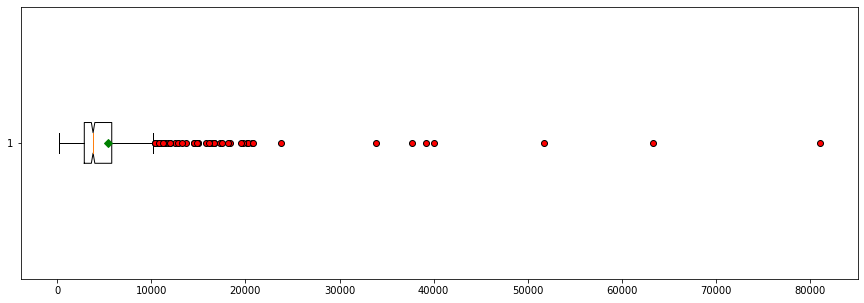


The description of the column: 
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

The kurtosis is:  63.0390403937373
The distribution is leptokurtic. The distribution has a sharp peak.

The skewness is:  6.523526250899361
The distribution has high skewness

The column normality: False


In [24]:
explore('ApplicantIncome')

NOTES:

1. There are some very large applicant incomes making the data very skewed
2. Binning this might give more information
3. Creating a log transformation of this data might increase its normality

###### [New feature]: ApplicantIncomeBracket

In [25]:
train['ApplicantIncomeBracket'] = np.where(train['ApplicantIncome'] < 2800, 'Low_Applicant_Income',
                                          np.where(train['ApplicantIncome'] < 3800, 'Medium_Applicant_Income',
                                          np.where(train['ApplicantIncome'] < 5800, 'High_Applicant_Income', 'Affluent_Applicant_Income')))

In [26]:
explore('ApplicantIncomeBracket')

Data type of column: object
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUALITATIVE

Medium_Applicant_Income      156
High_Applicant_Income        155
Affluent_Applicant_Income    154
Low_Applicant_Income         149
Name: ApplicantIncomeBracket, dtype: int64

Medium_Applicant_Income      25.407166
High_Applicant_Income        25.244300
Affluent_Applicant_Income    25.081433
Low_Applicant_Income         24.267101
Name: ApplicantIncomeBracket, dtype: float64



The approval rate per variable value is:
      ApplicantIncomeBracket  Loan_Status
0  Affluent_Applicant_Income     0.681818
1      High_Applicant_Income     0.690323
2       Low_Applicant_Income     0.684564
3    Medium_Applicant_Income     0.692308



The standard deviation / spread of approval rate per variable value is:
      ApplicantIncomeBracket  Loan_Status
0  Affluent_Applicant_Income     0.467290
1      High_Applicant_Income     0.463859
2       Low_Applicant_Income     0.466257
3    Medium_Applicant_Income     0.463025


###### [New feature]: LogApplicantIncome

In [27]:
#create a logarithm variable of this
train['LogApplicantIncome'] = np.log(train['ApplicantIncome'] + 1)

Data type of column: float64
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUANTITATIVE



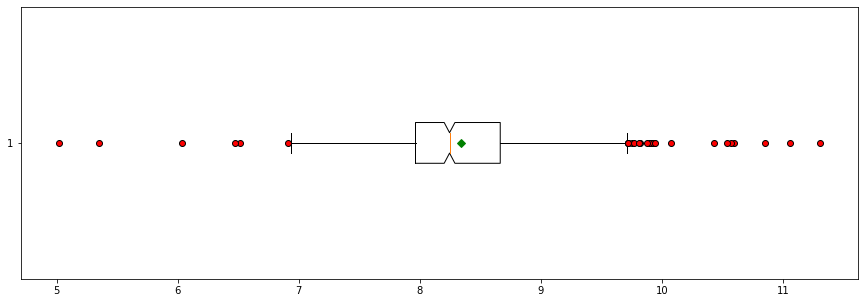


The description of the column: 
count    614.000000
mean       8.341510
std        0.645035
min        5.017280
25%        7.965024
50%        8.246303
75%        8.664922
max       11.302217
Name: LogApplicantIncome, dtype: float64

The kurtosis is:  6.639065888576138
The distribution is leptokurtic. The distribution has a sharp peak.

The skewness is:  0.4809493580463021
The distribution has low skewness.

The column normality: False


In [28]:
explore('LogApplicantIncome')

###### CoapplicantIncome

Data type of column: float64
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUANTITATIVE



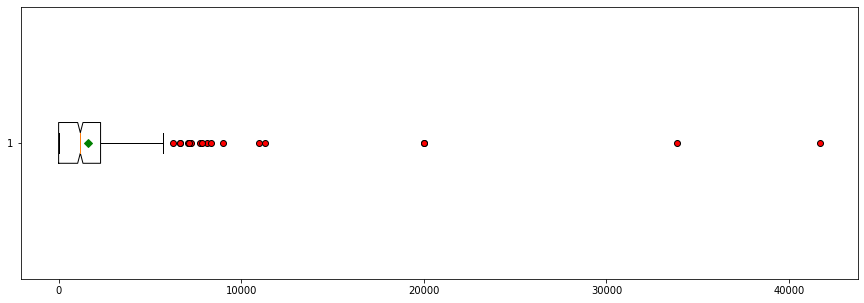


The description of the column: 
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

The kurtosis is:  87.25637650578992
The distribution is leptokurtic. The distribution has a sharp peak.

The skewness is:  7.473216996340462
The distribution has high skewness

The column normality: False


In [29]:
explore('CoapplicantIncome')

NOTES:

1. The data is very skewed. Binning it might bring out useful information
2. Creating a log transformation of this data might increase its normality

###### [New feature]: CoapplicantIncomeBracket

In [30]:
train['CoapplicantIncomeBracket'] = np.where(train['CoapplicantIncome'] < 500, 'Low_CoApplicant_Income',
                                          np.where(train['CoapplicantIncome'] < 1100, 'Medium_CoApplicant_Income',
                                          np.where(train['CoapplicantIncome'] < 2200, 'High_CoApplicant_Income', 'Affluent_CoApplicant_Income')))

In [31]:
explore('CoapplicantIncomeBracket')

Data type of column: object
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUALITATIVE

Low_CoApplicant_Income         279
Affluent_CoApplicant_Income    166
High_CoApplicant_Income        145
Medium_CoApplicant_Income       24
Name: CoapplicantIncomeBracket, dtype: int64

Low_CoApplicant_Income         45.439739
Affluent_CoApplicant_Income    27.035831
High_CoApplicant_Income        23.615635
Medium_CoApplicant_Income       3.908795
Name: CoapplicantIncomeBracket, dtype: float64



The approval rate per variable value is:
      CoapplicantIncomeBracket  Loan_Status
0  Affluent_CoApplicant_Income     0.686747
1      High_CoApplicant_Income     0.717241
2       Low_CoApplicant_Income     0.655914
3    Medium_CoApplicant_Income     0.875000



The standard deviation / spread of approval rate per variable value is:
      CoapplicantIncomeBracket  Loan_Status
0  Affluent_CoApplicant_Income     0.465220
1      High_CoApplicant_Income     0.451901
2       Low_CoApplicant_Income     0.475923
3    Medium_CoApplicant_Income     0.337832


###### [New feature]: LogCoApplicantIncome

New feature to calculate the log of the Coapplicantincome

In [32]:
#create a logarithm variable of this
train['LogCoApplicantIncome'] = np.log(train['CoapplicantIncome'] + 1)

Data type of column: float64
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUANTITATIVE



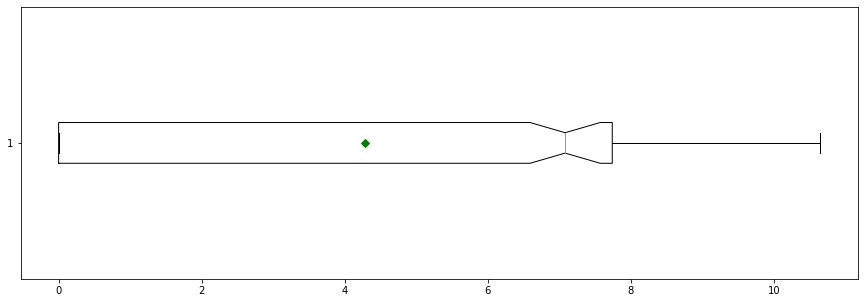


The description of the column: 
count    614.000000
mean       4.290129
std        3.875873
min        0.000000
25%        0.000000
50%        7.081125
75%        7.739897
max       10.637489
Name: LogCoApplicantIncome, dtype: float64

The kurtosis is:  1.094572908426782
The distribution is platykurtic. The distribution follows a normal distribution.

The skewness is:  -0.17265017128703458
The distribution has low skewness.

The column normality: False


In [33]:
explore('LogCoApplicantIncome')

###### [New feature]: Total Income

This is total income for the household

In [34]:
#Total Income
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

Data type of column: float64
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUANTITATIVE



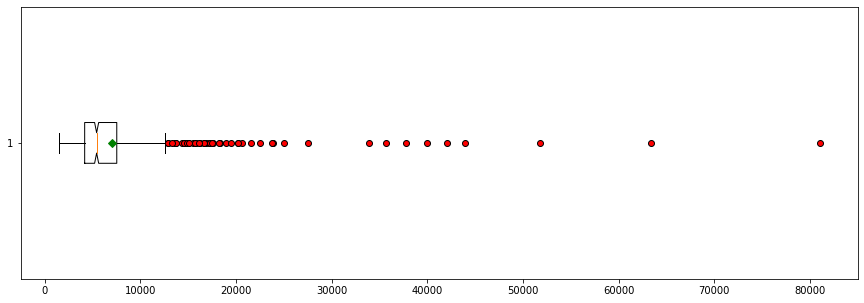


The description of the column: 
count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: TotalIncome, dtype: float64

The kurtosis is:  48.40266965267774
The distribution is leptokurtic. The distribution has a sharp peak.

The skewness is:  5.619676668480719
The distribution has high skewness

The column normality: False


In [35]:
explore('TotalIncome')

###### [New feature]: TotalIncomeBracket

In [36]:
train['TotalIncomeBracket'] = np.where(train['TotalIncome'] < 4000, 'Low_Total_Income',
                                          np.where(train['TotalIncome'] < 5500, 'Medium_Total_Income',
                                          np.where(train['TotalIncome'] < 7500, 'High_Total_Income', 'Affluent_Total_Income')))

In [37]:
explore('TotalIncomeBracket')

Data type of column: object
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUALITATIVE

Medium_Total_Income      175
Affluent_Total_Income    154
Low_Total_Income         143
High_Total_Income        142
Name: TotalIncomeBracket, dtype: int64

Medium_Total_Income      28.501629
Affluent_Total_Income    25.081433
Low_Total_Income         23.289902
High_Total_Income        23.127036
Name: TotalIncomeBracket, dtype: float64



The approval rate per variable value is:
      TotalIncomeBracket  Loan_Status
0  Affluent_Total_Income     0.675325
1      High_Total_Income     0.704225
2       Low_Total_Income     0.678322
3    Medium_Total_Income     0.691429



The standard deviation / spread of approval rate per variable value is:
      TotalIncomeBracket  Loan_Status
0  Affluent_Total_Income     0.469781
1      High_Total_Income     0.458006
2       Low_Total_Income     0.468762
3    Medium_Total_Income     0.463229


###### [New feature]: MonthlyIncome

In [38]:
train['MonthlyIncome'] = train['TotalIncome'] / 12

Data type of column: float64
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUANTITATIVE



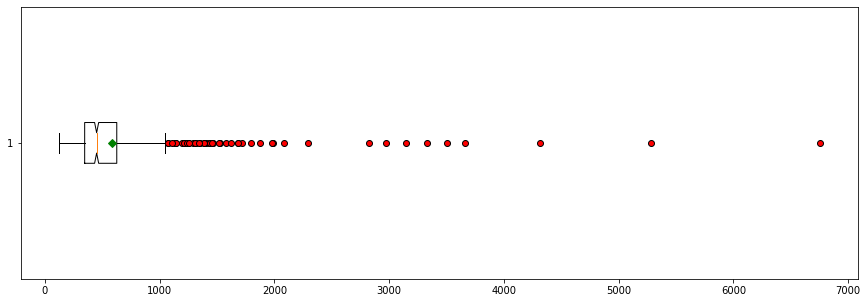


The description of the column: 
count     614.000000
mean      585.392090
std       538.221989
min       120.166667
25%       347.166667
50%       451.375000
75%       626.812500
max      6750.000000
Name: MonthlyIncome, dtype: float64

The kurtosis is:  48.402669652677716
The distribution is leptokurtic. The distribution has a sharp peak.

The skewness is:  5.619676668480718
The distribution has high skewness

The column normality: False


In [39]:
explore('MonthlyIncome')

###### [New feature]: LogMonthlyIncome

In [40]:
train['LogMonthlyIncome'] = np.log(train['MonthlyIncome'] + 1)

Data type of column: float64
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUANTITATIVE



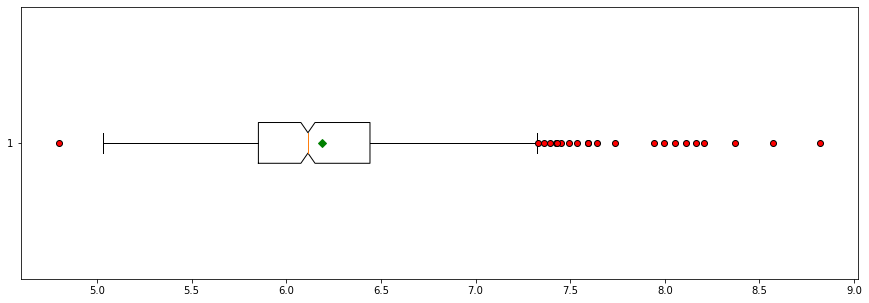


The description of the column: 
count    614.000000
mean       6.186843
std        0.544086
min        4.797167
25%        5.852681
50%        6.114511
75%        6.442237
max        8.817446
Name: LogMonthlyIncome, dtype: float64

The kurtosis is:  5.411939816563905
The distribution is leptokurtic. The distribution has a sharp peak.

The skewness is:  1.078201208237865
The distribution has high skewness

The column normality: False


In [41]:
explore('LogMonthlyIncome')

###### LoanAmount

In [42]:
#amount is in thousands so for comparisons to income, put it back up to thousands
train['LoanAmount'] = train['LoanAmount']  * 1000

Data type of column: float64
22 missing values out of 614 ( 3.5830618892508146 %)

Distribution of the data:



Variable is QUANTITATIVE



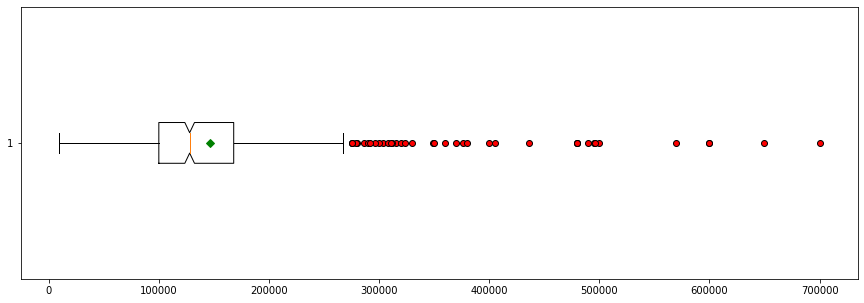


The description of the column: 
count       592.000000
mean     146412.162162
std       85587.325236
min        9000.000000
25%      100000.000000
50%      128000.000000
75%      168000.000000
max      700000.000000
Name: LoanAmount, dtype: float64

The kurtosis is:  13.30377216200319
The distribution is leptokurtic. The distribution has a sharp peak.

The skewness is:  2.67076256156513
The distribution has high skewness

The column normality: False


In [43]:
explore('LoanAmount')

In [44]:
#replace the missing values with the median
train['LoanAmount'] = train['LoanAmount'].fillna(np.nanmedian(train['LoanAmount']))

NOTES:

1. Some of the LoanAmounts are missing and a decision needs to be made how to deal with these
2. Other LoanAmounts are too high

In [45]:
train['LoanAmountBracket'] = np.where(train['LoanAmount'] < 100000, 'Low_Loan_Value',
                                        np.where(train['LoanAmount'] < 130000, 'Medium_Loan_Value',
                                        np.where(train['LoanAmount'] < 170000, 'High_Loan_Value', 'Affluent_Loan_Value')))

In [46]:
explore('LoanAmountBracket')

Data type of column: object
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUALITATIVE

Medium_Loan_Value      191
Affluent_Loan_Value    146
Low_Loan_Value         139
High_Loan_Value        138
Name: LoanAmountBracket, dtype: int64

Medium_Loan_Value      31.107492
Affluent_Loan_Value    23.778502
Low_Loan_Value         22.638436
High_Loan_Value        22.475570
Name: LoanAmountBracket, dtype: float64



The approval rate per variable value is:
     LoanAmountBracket  Loan_Status
0  Affluent_Loan_Value     0.643836
1      High_Loan_Value     0.724638
2       Low_Loan_Value     0.690647
3    Medium_Loan_Value     0.691099



The standard deviation / spread of approval rate per variable value is:
     LoanAmountBracket  Loan_Status
0  Affluent_Loan_Value     0.480513
1      High_Loan_Value     0.448324
2       Low_Loan_Value     0.463898
3    Medium_Loan_Value     0.463254


In [47]:
#create a log of this variable
train['LogLoanAmount'] = np.log(train['LoanAmount'] + 1)

Data type of column: float64
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUANTITATIVE



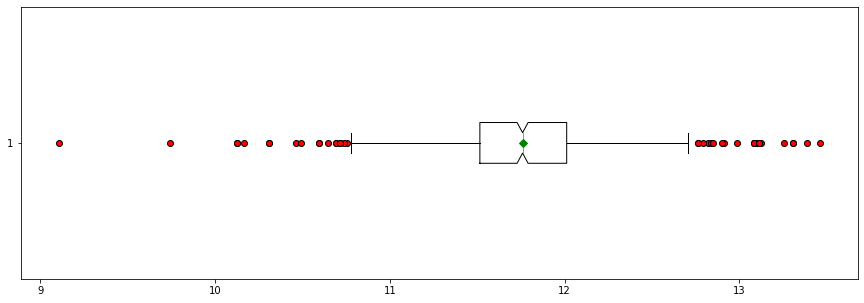


The description of the column: 
count    614.000000
mean      11.765014
std        0.495990
min        9.105091
25%       11.515423
50%       11.759793
75%       12.012187
max       13.458837
Name: LogLoanAmount, dtype: float64

The kurtosis is:  5.786003198567966
The distribution is leptokurtic. The distribution has a sharp peak.

The skewness is:  -0.19483185872733352
The distribution has low skewness.

The column normality: False


In [48]:
explore('LogLoanAmount')

###### Loan_Amount_Term

Data type of column: float64
14 missing values out of 614 ( 2.2801302931596092 %)

Distribution of the data:



Variable is QUANTITATIVE



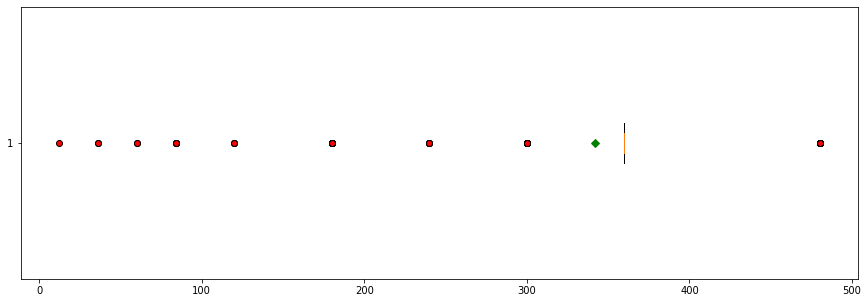


The description of the column: 
count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

The kurtosis is:  9.60800765884585
The distribution is leptokurtic. The distribution has a sharp peak.

The skewness is:  -2.3565039827009184
The distribution has high skewness

The column normality: False


In [49]:
explore('Loan_Amount_Term')

In [50]:
#replace the missing values with the median
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(np.nanmedian(train['Loan_Amount_Term']))

###### [New feature]: MonthlyInstallment

In [51]:
train['MonthlyInstallment'] = train['LoanAmount'] / train['Loan_Amount_Term']

Data type of column: float64
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUANTITATIVE



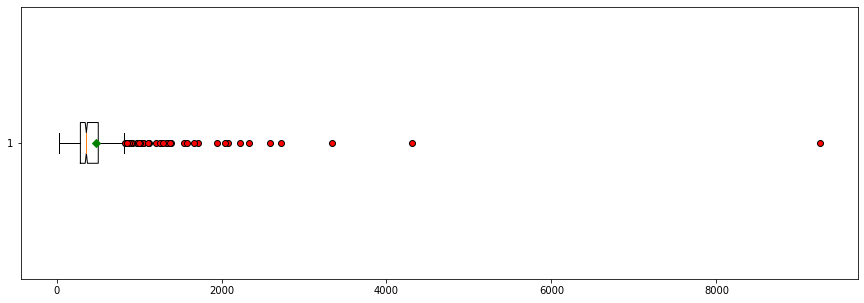


The description of the column: 
count     614.000000
mean      473.687083
std       511.134356
min        25.000000
25%       288.888889
50%       361.111111
75%       505.555556
max      9250.000000
Name: MonthlyInstallment, dtype: float64

The kurtosis is:  151.17679281669095
The distribution is leptokurtic. The distribution has a sharp peak.

The skewness is:  9.936350406533236
The distribution has high skewness

The column normality: False


In [52]:
explore('MonthlyInstallment')

###### [New feature]: LogMonthlyInstallment

In [53]:
train['LogMonthlyInstallment'] = np.log(train['MonthlyInstallment'] + 1)

Data type of column: float64
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUANTITATIVE



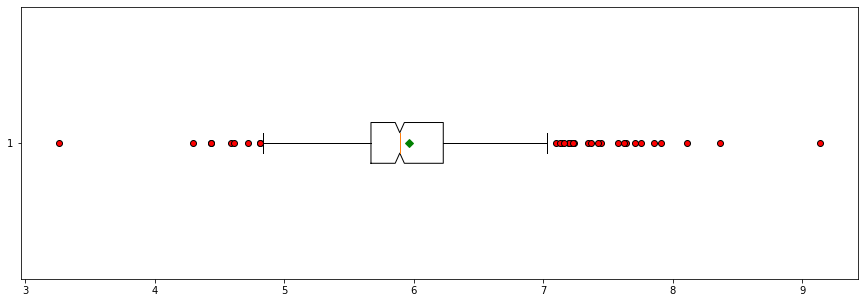


The description of the column: 
count    614.000000
mean       5.964764
std        0.562176
min        3.258097
25%        5.669498
50%        5.891951
75%        6.227634
max        9.132487
Name: LogMonthlyInstallment, dtype: float64

The kurtosis is:  6.6499455619426024
The distribution is leptokurtic. The distribution has a sharp peak.

The skewness is:  0.7144718724737474
The distribution has moderate skewness.

The column normality: False


In [54]:
explore('LogMonthlyInstallment')

###### [New feature]: Affordability

In [55]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0    128000.0             360.0   
1             4583             1508.0    128000.0             360.0   
2             3000                0.0     66000.0             360.0   
3             2583             2358.0    120000.0             360.0   
4             6000                0.0    141000.0             360.0   

  Credit_History Property_Area  Loan_Status     ApplicantIncomeBracket  \
0            1.0         Urban            1  Affluent_Applicant_Income   
1            1.0         Rural            0      High_Applicant_Income   
2            1.0         Urban            1    Medium_Applicant_Income   
3            1.0         Urban            1       Low_Applicant_Income   
4            1.0         Urban            1  Affluent_Applicant_Income   

   LogApplicantIncome     CoapplicantIncomeBracket  LogCoApplicantIncome  \
0            8.674197       Low_CoApplicant_Income              0.000000   
1            8.430327      High_CoApplicant_Income              7.319202   
2            8.006701       Low_CoApplicant_Income              0.000000   
3            7.857094  Affluent_CoApplicant_Income              7.765993   
4            8.699681       Low_CoApplicant_Income              0.000000   

   TotalIncome   TotalIncomeBracket  MonthlyIncome  LogMonthlyIncome  \
0       5849.0    High_Total_Income     487.416667          6.191169   
1       6091.0    High_Total_Income     507.583333          6.231629   
2       3000.0     Low_Total_Income     250.000000          5.525453   
3       4941.0  Medium_Total_Income     411.750000          6.022842   
4       6000.0    High_Total_Income     500.000000          6.216606   

   LoanAmountBracket  LogLoanAmount  MonthlyInstallment  LogMonthlyInstallment  
0  Medium_Loan_Value      11.759793          355.555556               5.876490  
1  Medium_Loan_Value      11.759793          355.555556               5.876490  
2     Low_Loan_Value      11.097425          183.333333               5.216746  
3  Medium_Loan_Value      11.695255          333.333333               5.812138  
4    High_Loan_Value      11.856522          391.666667               5.972961

General rule of thumb is the debt one pays should not be more than ~40% of income so use this fact to create an affordability measure

In [56]:
train['Affordability'] = (train['MonthlyInstallment'] < train['MonthlyIncome'])

#make it a Yes or No only
train['Affordability'] = np.where(train['Affordability'] == True, 'Yes', 'No')

In [57]:
explore('Affordability')

Data type of column: object
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUALITATIVE

Yes    479
No     135
Name: Affordability, dtype: int64

Yes    78.013029
No     21.986971
Name: Affordability, dtype: float64



The approval rate per variable value is:
  Affordability  Loan_Status
0            No     0.644444
1           Yes     0.699374



The standard deviation / spread of approval rate per variable value is:
  Affordability  Loan_Status
0            No     0.480464
1           Yes     0.459010


NOTES:

1. Many of the loans are for 360 months, which is the expected

###### Credit_History

In [58]:
explore('Credit_History')

Data type of column: object
50 missing values out of 614 ( 8.143322475570033 %)

Distribution of the data:



Variable is QUALITATIVE

1.0    475
0.0     89
Name: Credit_History, dtype: int64

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64



The approval rate per variable value is:
  Credit_History  Loan_Status
0            0.0     0.078652
1            1.0     0.795789



The standard deviation / spread of approval rate per variable value is:
  Credit_History  Loan_Status
0            0.0     0.270720
1            1.0     0.403549


In [59]:
#replace with the majority / highest probability value i.e. 1
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

NOTES:

1. A majority of the applicants have credit history that meets the guidelines
2. The ones whose credit history meets the guidelines have a much higher chance of getting the loan approved (79.5%) compared to those who do not (7.8%)

###### Property_Area

In [60]:
explore('Property_Area')

Data type of column: object
0 missing values out of 614 ( 0.0 %)

Distribution of the data:



Variable is QUALITATIVE

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64



The approval rate per variable value is:
  Property_Area  Loan_Status
0         Rural     0.614525
1     Semiurban     0.768240
2         Urban     0.658416



The standard deviation / spread of approval rate per variable value is:
  Property_Area  Loan_Status
0         Rural     0.488073
1     Semiurban     0.422865
2         Urban     0.475419


NOTES:

1. Approval rates are higher for applicants wanting to loans for purchases in Semiurban areas. 

### Final checks and cleanups

In [61]:
#feature types
quantitative = [f for f in train.columns if train.dtypes[f].name not in ['object', 'category']]
quantitative.remove('Loan_Status')

qualitative = [f for f in train.columns if train.dtypes[f].name in ['object', 'category']]
qualitative.remove('Loan_ID')

In [62]:
quantitative

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'LogApplicantIncome',
 'LogCoApplicantIncome',
 'TotalIncome',
 'MonthlyIncome',
 'LogMonthlyIncome',
 'LogLoanAmount',
 'MonthlyInstallment',
 'LogMonthlyInstallment']

In [63]:
qualitative

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'ApplicantIncomeBracket',
 'CoapplicantIncomeBracket',
 'TotalIncomeBracket',
 'LoanAmountBracket',
 'Affordability']

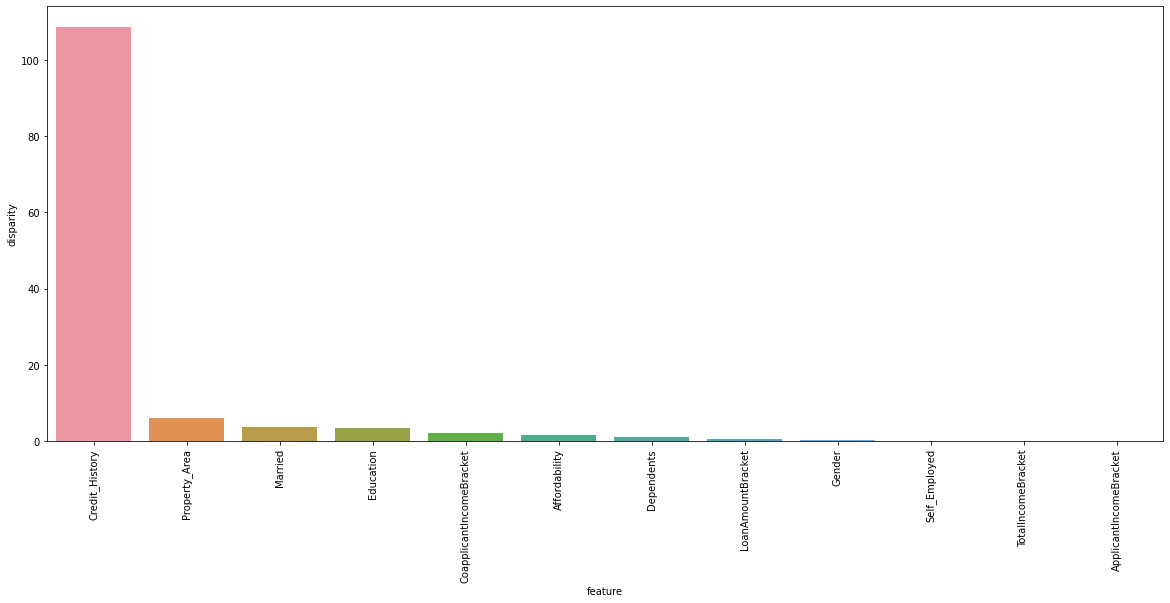

In [64]:
#one way anova calculations to see which categorical values are more influential on loan prediction
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['Loan_Status'].values
            samples.append(s)
        pval = st.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals

    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(20,8))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)
plt.show()

In [65]:
#encoding the categorical variables
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'Loan_Status']].groupby(feature).mean()['Loan_Status']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['Gender_E', 'Married_E', 'Dependents_E', 'Education_E', 'Self_Employed_E', 'Credit_History_E', 'Property_Area_E', 'ApplicantIncomeBracket_E', 'CoapplicantIncomeBracket_E', 'TotalIncomeBracket_E', 'LoanAmountBracket_E', 'Affordability_E']


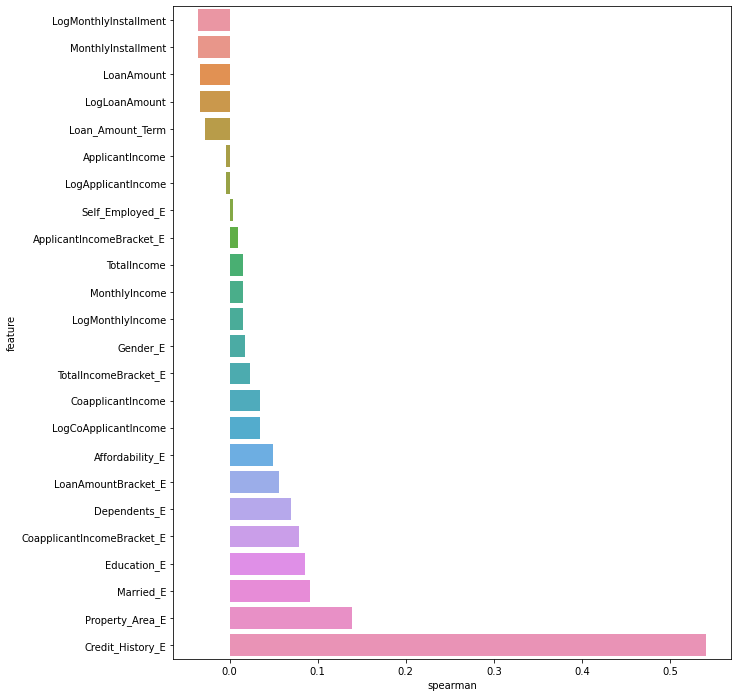

In [66]:
# Spearman Correlations with the Loan_Status

def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['Loan_Status'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(10, 0.5*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)

Credit_History and previous debt performance of the customer plays a huge role in  whether the loan will be approved or not

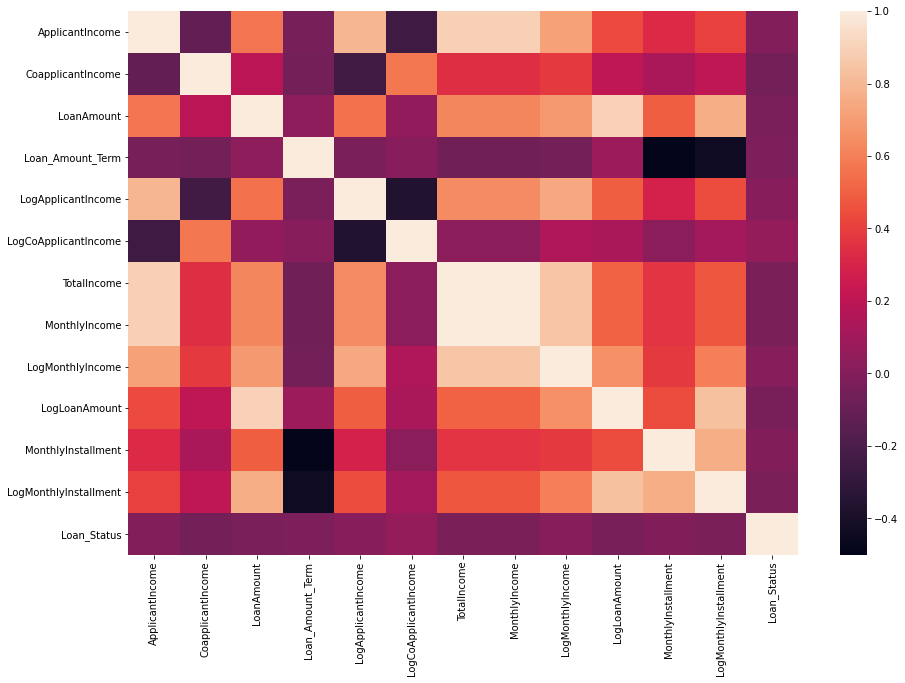

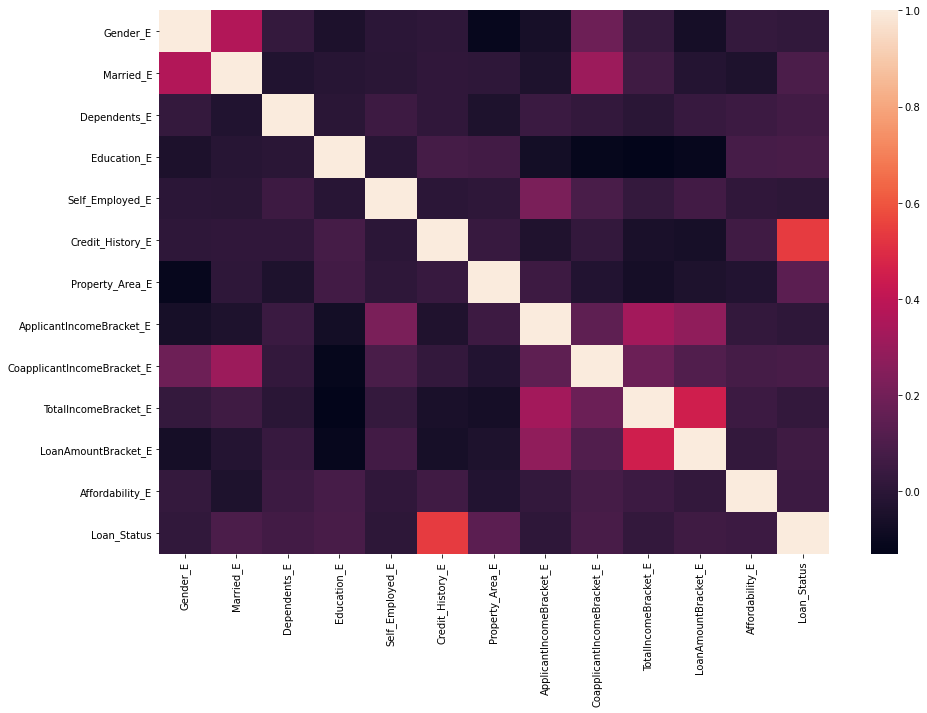

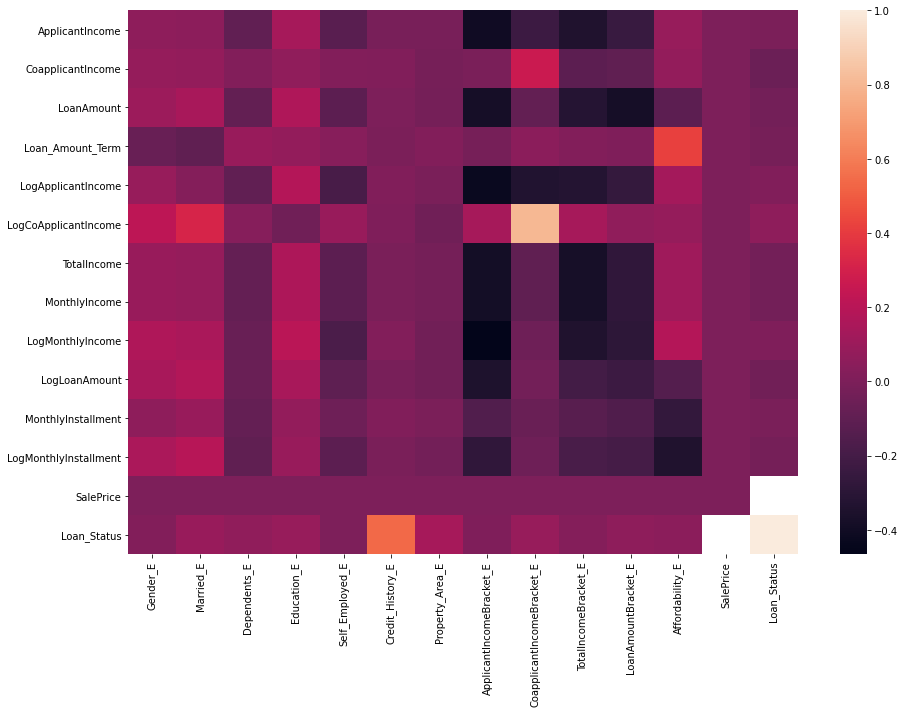

In [67]:
#correlations of quantitative prices
plt.figure(1, figsize=(15,10))
corr = train[quantitative+['Loan_Status']].corr()
sns.heatmap(corr)

#encoded qualitative features correlations
plt.figure(2, figsize=(15,10))
corr = train[qual_encoded+['Loan_Status']].corr()
sns.heatmap(corr)

plt.figure(3, figsize=(15,10))
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['Loan_Status']:
    for q2 in qual_encoded+['Loan_Status']:
        corr.loc[q1, q2] = train[q1].corr(train[q2])
        

sns.heatmap(corr)
plt.show()

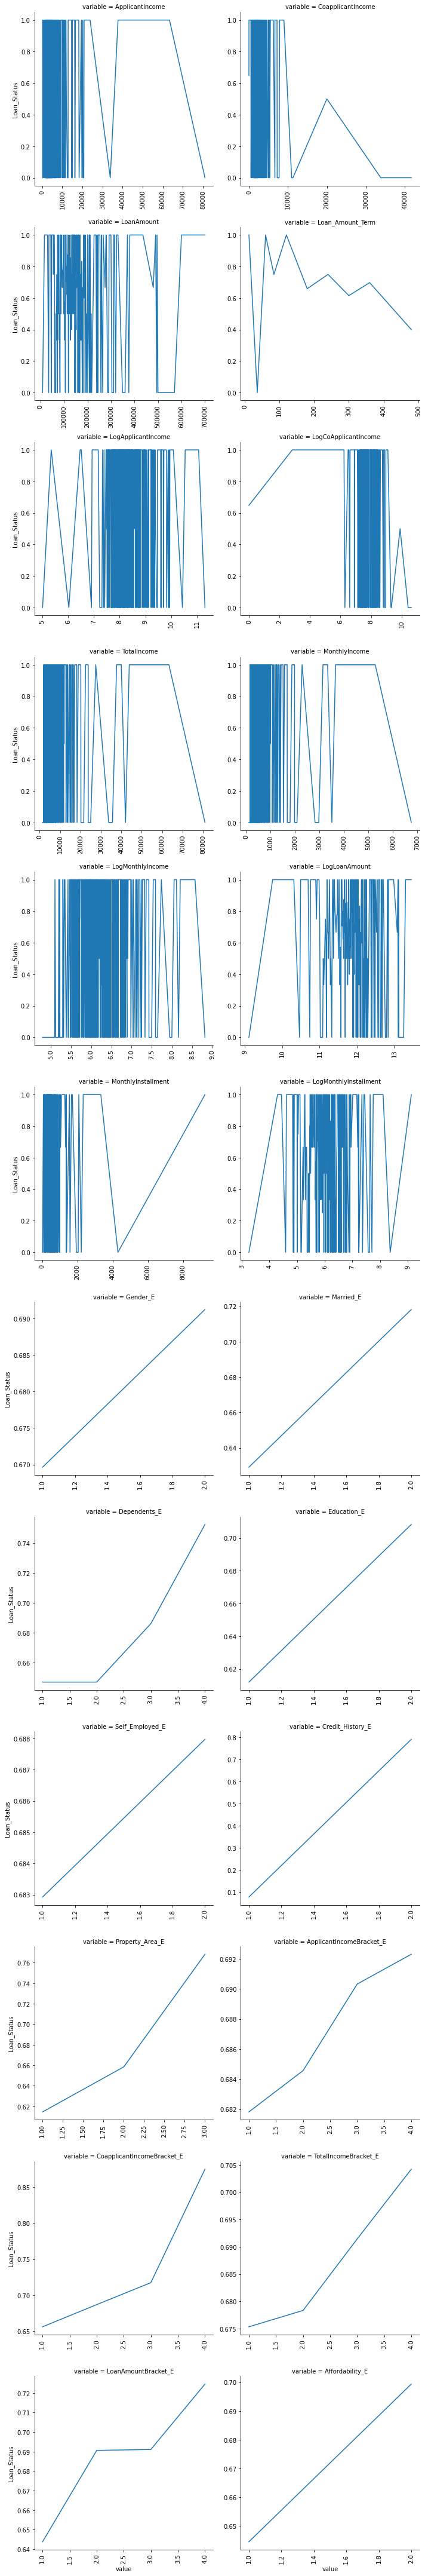

In [68]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['Loan_Status'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(pairplot, "value", "Loan_Status")

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



0.8065453372245129


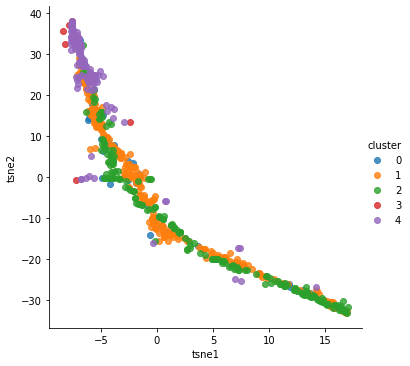

In [69]:
#Clustering

features = quantitative + qual_encoded

#use TSNE to see some clusters from high dimensions 
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = train[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)

#do principal component analysis for the top 30 components
pca = PCA(n_components=10)
pca.fit(s)
pc = pca.transform(s)

#use kmeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

The first 10 PCA components explain ~83% of the variance in the data

In [70]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0    128000.0             360.0   
1             4583             1508.0    128000.0             360.0   
2             3000                0.0     66000.0             360.0   
3             2583             2358.0    120000.0             360.0   
4             6000                0.0    141000.0             360.0   

  Credit_History Property_Area  Loan_Status     ApplicantIncomeBracket  \
0            1.0         Urban            1  Affluent_Applicant_Income   
1            1.0         Rural            0      High_Applicant_Income   
2            1.0         Urban            1    Medium_Applicant_Income   
3            1.0         Urban            1       Low_Applicant_Income   
4            1.0         Urban            1  Affluent_Applicant_Income   

   LogApplicantIncome     CoapplicantIncomeBracket  LogCoApplicantIncome  \
0            8.674197       Low_CoApplicant_Income              0.000000   
1            8.430327      High_CoApplicant_Income              7.319202   
2            8.006701       Low_CoApplicant_Income              0.000000   
3            7.857094  Affluent_CoApplicant_Income              7.765993   
4            8.699681       Low_CoApplicant_Income              0.000000   

   TotalIncome   TotalIncomeBracket  MonthlyIncome  LogMonthlyIncome  \
0       5849.0    High_Total_Income     487.416667          6.191169   
1       6091.0    High_Total_Income     507.583333          6.231629   
2       3000.0     Low_Total_Income     250.000000          5.525453   
3       4941.0  Medium_Total_Income     411.750000          6.022842   
4       6000.0    High_Total_Income     500.000000          6.216606   

   LoanAmountBracket  LogLoanAmount  MonthlyInstallment  \
0  Medium_Loan_Value      11.759793          355.555556   
1  Medium_Loan_Value      11.759793          355.555556   
2     Low_Loan_Value      11.097425          183.333333   
3  Medium_Loan_Value      11.695255          333.333333   
4    High_Loan_Value      11.856522          391.666667   

   LogMonthlyInstallment Affordability  Gender_E  Married_E  Dependents_E  \
0               5.876490           Yes       2.0        1.0           3.0   
1               5.876490           Yes       2.0        2.0           1.0   
2               5.216746           Yes       2.0        2.0           3.0   
3               5.812138           Yes       2.0        2.0           3.0   
4               5.972961           Yes       2.0        1.0           3.0   

   Education_E  Self_Employed_E  Credit_History_E  Property_Area_E  \
0          2.0              2.0               2.0              2.0   
1          2.0              2.0               2.0              1.0   
2          2.0              1.0               2.0              2.0   
3          1.0              2.0               2.0              2.0   
4          2.0              2.0               2.0              2.0   

   ApplicantIncomeBracket_E  CoapplicantIncomeBracket_E  TotalIncomeBracket_E  \
0                       1.0                         1.0                   4.0   
1                       3.0                         3.0                   4.0   
2                       4.0                         1.0                   2.0   
3                       2.0                         2.0                   3.0   
4                       1.0                         1.0                   4.0   

   LoanAmountBracket_E  Affordability_E  
0                  3.0              2.0  
1                

In [71]:
#drop unnecessary columns first categorical ones not encoded
qual_encoded

['Gender_E',
 'Married_E',
 'Dependents_E',
 'Education_E',
 'Self_Employed_E',
 'Credit_History_E',
 'Property_Area_E',
 'ApplicantIncomeBracket_E',
 'CoapplicantIncomeBracket_E',
 'TotalIncomeBracket_E',
 'LoanAmountBracket_E',
 'Affordability_E']

In [72]:
train_clean = train.drop(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History',
                          'Property_Area', 'ApplicantIncomeBracket', 'CoapplicantIncomeBracket', 'TotalIncomeBracket',
                          'LoanAmountBracket', 'Affordability', 'ApplicantIncome', 'CoapplicantIncome',
                         'LoanAmount', 'Loan_Amount_Term', 'TotalIncome', 'MonthlyIncome', 'MonthlyInstallment'], axis = 1)

In [73]:
train_clean.head()

Loan_Status  LogApplicantIncome  LogCoApplicantIncome  LogMonthlyIncome  \
0            1            8.674197              0.000000          6.191169   
1            0            8.430327              7.319202          6.231629   
2            1            8.006701              0.000000          5.525453   
3            1            7.857094              7.765993          6.022842   
4            1            8.699681              0.000000          6.216606   

   LogLoanAmount  LogMonthlyInstallment  Gender_E  Married_E  Dependents_E  \
0      11.759793               5.876490       2.0        1.0           3.0   
1      11.759793               5.876490       2.0        2.0           1.0   
2      11.097425               5.216746       2.0        2.0           3.0   
3      11.695255               5.812138       2.0        2.0           3.0   
4      11.856522               5.972961       2.0        1.0           3.0   

   Education_E  Self_Employed_E  Credit_History_E  Property_Area_E  \
0          2.0              2.0               2.0              2.0   
1          2.0              2.0               2.0              1.0   
2          2.0              1.0               2.0              2.0   
3          1.0              2.0               2.0              2.0   
4          2.0              2.0               2.0              2.0   

   ApplicantIncomeBracket_E  CoapplicantIncomeBracket_E  TotalIncomeBracket_E  \
0                       1.0                         1.0                   4.0   
1                       3.0                         3.0                   4.0   
2                       4.0                         1.0                   2.0   
3                       2.0                         2.0                   3.0   
4                       1.0                         1.0                   4.0   

   LoanAmountBracket_E  Affordability_E  
0                  3.0              2.0  
1                  3.0              2.0  
2                  2.0              2.0  
3                  3.0              2.0  
4                  4.0              2.0

In [74]:
#encode the y label
le = LabelEncoder()
train_clean['Loan_Status'] = le.fit_transform(train_clean['Loan_Status'])

In [75]:
#scale the dataset
#scaler = StandardScaler()
#train_clean[quantitative] = scaler.fit_transform(train[quantitative])

In [76]:
#get dummies
#train_clean = pd.get_dummies(train_clean)

In [77]:
#check for any remaining NaNs
train_clean.isnull().sum()

Loan_Status                   0
LogApplicantIncome            0
LogCoApplicantIncome          0
LogMonthlyIncome              0
LogLoanAmount                 0
LogMonthlyInstallment         0
Gender_E                      0
Married_E                     0
Dependents_E                  0
Education_E                   0
Self_Employed_E               0
Credit_History_E              0
Property_Area_E               0
ApplicantIncomeBracket_E      0
CoapplicantIncomeBracket_E    0
TotalIncomeBracket_E          0
LoanAmountBracket_E           0
Affordability_E               0
dtype: int64

In [78]:
train_clean.head()

Loan_Status  LogApplicantIncome  LogCoApplicantIncome  LogMonthlyIncome  \
0            1            8.674197              0.000000          6.191169   
1            0            8.430327              7.319202          6.231629   
2            1            8.006701              0.000000          5.525453   
3            1            7.857094              7.765993          6.022842   
4            1            8.699681              0.000000          6.216606   

   LogLoanAmount  LogMonthlyInstallment  Gender_E  Married_E  Dependents_E  \
0      11.759793               5.876490       2.0        1.0           3.0   
1      11.759793               5.876490       2.0        2.0           1.0   
2      11.097425               5.216746       2.0        2.0           3.0   
3      11.695255               5.812138       2.0        2.0           3.0   
4      11.856522               5.972961       2.0        1.0           3.0   

   Education_E  Self_Employed_E  Credit_History_E  Property_Area_E  \
0          2.0              2.0               2.0              2.0   
1          2.0              2.0               2.0              1.0   
2          2.0              1.0               2.0              2.0   
3          1.0              2.0               2.0              2.0   
4          2.0              2.0               2.0              2.0   

   ApplicantIncomeBracket_E  CoapplicantIncomeBracket_E  TotalIncomeBracket_E  \
0                       1.0                         1.0                   4.0   
1                       3.0                         3.0                   4.0   
2                       4.0                         1.0                   2.0   
3                       2.0                         2.0                   3.0   
4                       1.0                         1.0                   4.0   

   LoanAmountBracket_E  Affordability_E  
0                  3.0              2.0  
1                  3.0              2.0  
2                  2.0              2.0  
3                  3.0              2.0  
4                  4.0              2.0

In [79]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Loan_Status                 614 non-null    int64  
 1   LogApplicantIncome          614 non-null    float64
 2   LogCoApplicantIncome        614 non-null    float64
 3   LogMonthlyIncome            614 non-null    float64
 4   LogLoanAmount               614 non-null    float64
 5   LogMonthlyInstallment       614 non-null    float64
 6   Gender_E                    614 non-null    float64
 7   Married_E                   614 non-null    float64
 8   Dependents_E                614 non-null    float64
 9   Education_E                 614 non-null    float64
 10  Self_Employed_E             614 non-null    float64
 11  Credit_History_E            614 non-null    float64
 12  Property_Area_E             614 non-null    float64
 13  ApplicantIncomeBracket_E    614 non

In [80]:
train_clean.columns

Index(['Loan_Status', 'LogApplicantIncome', 'LogCoApplicantIncome',
       'LogMonthlyIncome', 'LogLoanAmount', 'LogMonthlyInstallment',
       'Gender_E', 'Married_E', 'Dependents_E', 'Education_E',
       'Self_Employed_E', 'Credit_History_E', 'Property_Area_E',
       'ApplicantIncomeBracket_E', 'CoapplicantIncomeBracket_E',
       'TotalIncomeBracket_E', 'LoanAmountBracket_E', 'Affordability_E'],
      dtype='object')

In [81]:
#write this as a csv
train_clean.to_csv("../data/train_clean.csv", index = False)